# Logistic Regression Assignment

# Problem Statement:
    Census-income data plays the most important role in the democratic system of
    government, highly affecting the economic sectors. Census-related figures are used
    to allocate federal funding by the government to different states and localities.
    Census data is also used for post census residents estimates and predictions,
    economic and social science research, and many other such applications.
    Therefore, the importance of this data and its accurate predictions is very clear to us.
    The main aim is to increase awareness about how the income factor actually has an
    impact not only on the individual lives of citizens but also an effect on the nation and
    its betterment. You will have a look at the data pulled out from the 1994 Census
    bureau database, and try to find insights into how various features have an effect on
    the income of an individual.
    The data contains approximately 32,000 observations with over 15 variables.
    The strategy is to analyze the data and perform a predictive task of classification to
    predict whether an individual makes over 50K a year or less by using a logistic
    regression algorithm.

# 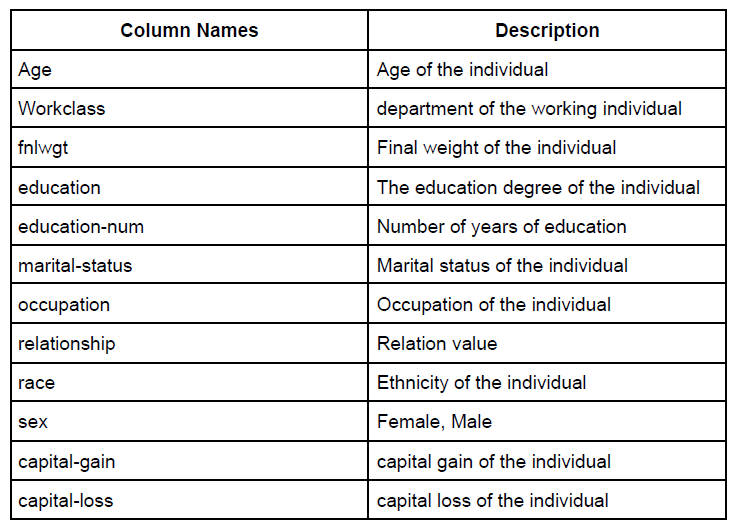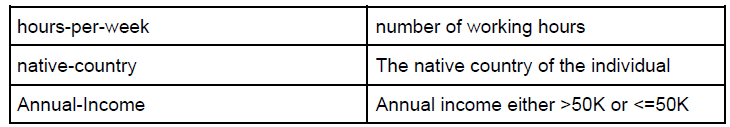

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import CSV_EDA

In [38]:
csvRader = CSV_EDA.ReadCSVFile('census-income .csv')
c_data = csvRader.getdata()

In [39]:
c_data.tail()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,annual_income
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32560,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [40]:
# df = pd.read_csv('census-income .csv')
# df.isnull().sum()

In [41]:
c_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  annual_income   32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [42]:
# c_data.isnull("?").sum()

In [43]:
c_data.shape

(32561, 15)

In [44]:
c_data.dropna(inplace=True)

In [45]:
c_data.shape

(32561, 15)

In [46]:
c_data.duplicated().sum()

24

In [47]:
c_data.drop_duplicates(inplace=True)

In [48]:
c_data.duplicated().sum()

0

In [49]:
c_data.shape

(32537, 15)

In [50]:
# filterNaN =c_data['sex'].isnull()==True
# c_data[filterNaN]

c_data.loc[c_data['workclass'] == "?"].count()["workclass"]

1836

# 1. How many types of occupations do we have?
    a. 13
    b. 14
    c. 15
    d. 11



In [51]:
c_data.occupation.nunique()

15

# 2. How many people are working as tech support and have an annual income greater than 50k?
    a. 278
    b. 389
    c. 289
    d. 934


In [52]:
all_ocp = c_data[(c_data["occupation"]=='Tech-support') & (c_data["annual_income"]==">50K")]

In [53]:
all_ocp.count()

age               283
workclass         283
fnlwgt            283
education         283
education-num     283
marital-status    283
occupation        283
relationship      283
race              283
sex               283
capital-gain      283
capital-loss      283
hours-per-week    283
native-country    283
annual_income     283
dtype: int64

In [54]:
all_ocp = c_data.groupby(["occupation"])["occupation"].count()
# type(all_ocp.to_frame().reset_index())
all_ocp.to_frame(name="count").reset_index()

,occupation,count
0,?,1843
1,Adm-clerical,3768
2,Armed-Forces,9
3,Craft-repair,4094
4,Exec-managerial,4065
5,Farming-fishing,992
6,Handlers-cleaners,1369
7,Machine-op-inspct,2000
8,Other-service,3291
9,Priv-house-serv,147


In [55]:
tch_support_income_gtr_thn_50k_filter = ((c_data["occupation"]=="Tech-support") & 
                                         ((c_data["annual_income"]==">50K") | 
                                          (c_data["annual_income"]=="=50K" )| 
                                          (c_data["annual_income"]==">=50K" )))
c_data[tch_support_income_gtr_thn_50k_filter]["occupation"].count()



283

In [56]:
t_data = c_data[c_data["occupation"]=="Tech-support"]
t_data = t_data.groupby(["annual_income"])["annual_income"].count()
t_data

annual_income
<=50K    644
>50K     283
Name: annual_income, dtype: int64

# Answer 283

# 3. How many total missing values are present in the dataset?
    a. 4262
    b. 5000
    c. 5349
    d. 4302


In [57]:
c_data.columns
totna =0
for cols in c_data.columns:
    count_nan =0
    count_nan = c_data[c_data[cols]=="?"].count()[cols]
    print(cols,count_nan)
    totna = totna + count_nan
print("Total missing:",totna)

age 0
workclass 1836
fnlwgt 0
education 0
education-num 0
marital-status 0
occupation 1843
relationship 0
race 0
sex 0
capital-gain 0
capital-loss 0
hours-per-week 0
native-country 582
annual_income 0
Total missing: 4261


In [58]:
c_data.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32537.000000,3.253700e+04,32537.000000,32537.000000,32537.000000,32537.000000
mean,38.585549,1.897808e+05,10.081815,1078.443741,87.368227,40.440329
std,13.637984,1.055565e+05,2.571633,7387.957424,403.101833,12.346889
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.369930e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


# 4. If there are missing values in the Marital Status column, which option among the following should be used for replacing the missing values:
    a. Mean
    b. Median
    c. Mode
    d. All of the above

# Answer c

# 5. How many people are having private work classes and are not from the United States of America?
    a. 2151
    b. 2300
    c. 2000
    d. 2190


In [59]:
filter_private_work = ((c_data["workclass"]=='Private') & (c_data["native-country"]!= "United-States"))
c_data[filter_private_work].count()["workclass"]

2554

In [60]:
df = c_data.drop_duplicates()
filter_private_work = ((df["workclass"]=='Private') & (df["native-country"]!= "United-States"))
df[filter_private_work].nunique()["fnlwgt"]

2150

# 6. How many people are either having Annual Income(last column) less than or equal to 50k or their working hours is greater than or equal to 40 hrs:
    a. 23008
    b. 23448
    c. 29505
    d. 25903


In [71]:
filter_private_work = ((c_data["annual_income"]=='<=50K') | (c_data["hours-per-week"]>=40))
c_data[filter_private_work].count()["annual_income"]

31799

In [68]:
# c_data[filter_private_work]["annual_income"].sum()

In [62]:
# # t_data = c_data[c_data["occupation"]=="Tech-support"]
# t_data = c_data.groupby(["annual_income","hours-per-week"])["annual_income"].count()
# # c_data[t_data]
# t_data = t_data.to_frame(name="count").reset_index()
# # type(t_data)
# t_data[t_data["annual_income"]=="<=50K"].count()

# 7. Which of the following methods can you use for handling outliers?
    a. Interquartile Range(IQR) Method
    b. Z Score method
    c. Both of the above methods
    d. None of the above


# Answer c

# 8. Chi-square is used to analyze:
    a. Determine the relationship b/w the variables
    b. Compare observed results with expected results
    c. both a and b
    d. None of the above


# Amswer B

# 9. What is VIF?
    a. It can detect multicollinearity
    b. If the VIF value is greater than 10, then there is no correlation between
    the independent variables
    c. It stands for Variance Impact Factor
    d. VIF is when there is no correlation between one predictor and the other
    predictors in a model.


# Answer A

# 10.What predict_proba will tell you?
    a. It will predict the class probabilities
    b. It will tell you the target value
    c. Both are correct
    d. None of the above


scikit-learn provides a predict_proba method for logistic regression, which returns the predicted probabilities for each class. In binary classification, the predict_proba method returns a 2-dimensional array with shape (n_samples, 2), where n_samples is the number of samples and the first column represents the probability of the negative class and the second column represents the probability of the positive class.

In [192]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Load the iris dataset
iris = load_iris()
# iris
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=42)

# Train a logistic regression model
clf = LogisticRegression(random_state=42)
clf.fit(X_train, y_train)

C:\Users\27746\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [193]:
# Predict the probabilities of the test set
proba = clf.predict_proba(X_test)

# Print the predicted probabilities
print(proba)

[[3.78546414e-03 8.27209125e-01 1.69005411e-01]
 [9.46715849e-01 5.32839506e-02 2.00065738e-07]
 [8.72667869e-09 1.55702334e-03 9.98442968e-01]
 [6.43492314e-03 7.92123358e-01 2.01441719e-01]
 [1.44114053e-03 7.74296128e-01 2.24262731e-01]
 [9.55769961e-01 4.42298617e-02 1.76949624e-07]
 [7.76227744e-02 9.08067734e-01 1.43094917e-02]
 [1.61435709e-04 1.55688827e-01 8.44149737e-01]
 [2.20813041e-03 7.62682834e-01 2.35109036e-01]
 [2.83209562e-02 9.45783073e-01 2.58959704e-02]
 [4.39778584e-04 2.43338866e-01 7.56221356e-01]
 [9.68311159e-01 3.16887627e-02 7.81177481e-08]
 [9.72933634e-01 2.70663326e-02 3.33567975e-08]
 [9.62098336e-01 3.79015525e-02 1.10990789e-07]
 [9.79266617e-01 2.07333183e-02 6.47655928e-08]
 [4.54262691e-03 7.12679398e-01 2.82777975e-01]
 [7.22936792e-06 2.42139263e-02 9.75778844e-01]
 [2.73361883e-02 9.47674145e-01 2.49896671e-02]
 [8.23339605e-03 8.31124999e-01 1.60641605e-01]
 [1.41995339e-05 3.59470991e-02 9.64038701e-01]
 [9.64368517e-01 3.56312904e-02 1.929642

# Answer A

# 11.Logistic regression is useful for regression problems:
    a. True
    b. False


Logistic regression is a machine learning algorithm that is used to solve Classification problems. Whereas, Linear regression is a machine learning algorithm that is used to solve Regression problems.

https://ai.plainenglish.io/why-is-logistic-regression-called-regression-if-it-is-a-classification-algorithm-9c2a166e7b74

# Answer B

# 12.In logistic regression, if the predicted logit is 0, what’s the transformed probability?
    a. 0.5
    b. 0.05
    c. Both of the above
    d. None of the above


https://study.sagepub.com/mehmetogluandjakobsen/student-resources/chapter-8/multiple-choice-quizzes

# Answer A

# 13.Which variant of logistic regression is recommended when you have a categorical dependent variable with more than two values?
    a. Multiple Logistic regression
    b. Multinomial logistic regression
    c. Ordered logit regression
    d. Poisson regression



https://study.sagepub.com/mehmetogluandjakobsen/student-resources/chapter-8/multiple-choice-quizzes

# Answer B

# Perform the following tasks for answering the remaining questions
    ● Rename the last column as Annual Income
    ● Remove the missing values from the dataset
    ● Change the labels of categorical data into numerical data using Label
    Encoder.
    ● Split the dataset into a train and test of proportions 70:30 and set the random
    state to 0.
    ● Build a Logistic Regression Model on the data.
    Answer the following questions with the help of the above-created model.

In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import CSV_EDA
rcd = CSV_EDA.ReadCSVFile('census-income .csv')
c_data = rcd.getdata()

In [74]:
c_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  annual_income   32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [75]:
c_data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,annual_income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [76]:
# ● Rename the last column as Annual Income

c_data.rename(columns={"annual_income":"Annual Income"}, inplace=True)
c_data.head()


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Annual Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [77]:
# Remove the missing values from the dataset
c_data.columns
totna =0
for cols in c_data.columns:
    count_nan =0
    count_nan = c_data[c_data[cols]=="?"].count()[cols]
    print(cols,count_nan)
    totna = totna + count_nan
print("Total missing:",totna)

age 0
workclass 1836
fnlwgt 0
education 0
education-num 0
marital-status 0
occupation 1843
relationship 0
race 0
sex 0
capital-gain 0
capital-loss 0
hours-per-week 0
native-country 583
Annual Income 0
Total missing: 4262


In [78]:
# c_data.replace('?', np.nan, inplace=True)
rcd.ReplaceDataWithNaN()

In [79]:
c_data.columns
totna =0
for cols in c_data.columns:
    count_nan =0
    count_nan = c_data[c_data[cols]=="?"].count()[cols]
    print(cols,count_nan)
    totna = totna + count_nan
print("Total missing:",totna)

age 0
workclass 0
fnlwgt 0
education 0
education-num 0
marital-status 0
occupation 0
relationship 0
race 0
sex 0
capital-gain 0
capital-loss 0
hours-per-week 0
native-country 0
Annual Income 0
Total missing: 0


In [80]:
c_data.isna().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
Annual Income        0
dtype: int64

In [81]:
c_data.shape

(32561, 15)

In [82]:
c_data = c_data.dropna()

In [83]:
c_data.shape

(30162, 15)

In [84]:
c_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30162 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             30162 non-null  int64 
 1   workclass       30162 non-null  object
 2   fnlwgt          30162 non-null  int64 
 3   education       30162 non-null  object
 4   education-num   30162 non-null  int64 
 5   marital-status  30162 non-null  object
 6   occupation      30162 non-null  object
 7   relationship    30162 non-null  object
 8   race            30162 non-null  object
 9   sex             30162 non-null  object
 10  capital-gain    30162 non-null  int64 
 11  capital-loss    30162 non-null  int64 
 12  hours-per-week  30162 non-null  int64 
 13  native-country  30162 non-null  object
 14  Annual Income   30162 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [85]:
# col_list = rcd.getObjectColumns('object')
# col_list

In [86]:
column_list = rcd.getNumericColumnList()
column_list

,index,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
0,age,1.000000,-0.076646,0.036527,0.077674,0.057775,0.068756
1,fnlwgt,-0.076646,1.000000,-0.043195,0.000432,-0.010252,-0.018768
2,education-num,0.036527,-0.043195,1.000000,0.122630,0.079923,0.148123
3,capital-gain,0.077674,0.000432,0.122630,1.000000,-0.031615,0.078409
4,capital-loss,0.057775,-0.010252,0.079923,-0.031615,1.000000,0.054256
5,hours-per-week,0.068756,-0.018768,0.148123,0.078409,0.054256,1.000000


In [87]:

# for column_name in column_list["index"]: #column_list:
#     Q1 =c_data[column_name].quantile(0.25)
#     Q3 = c_data[column_name].quantile(0.75)
#     IQR = Q3 - Q1
#     LowerOuterlier = Q1 - (IQR * 1.5) # also called lower_whisker
#     UpperOuterlier = Q3 + (IQR * 1.5)  # also called upper_whisker

#     median = (c_data[column_name].median())
#     print(Q1,Q3,column_name,median,LowerOuterlier,UpperOuterlier)

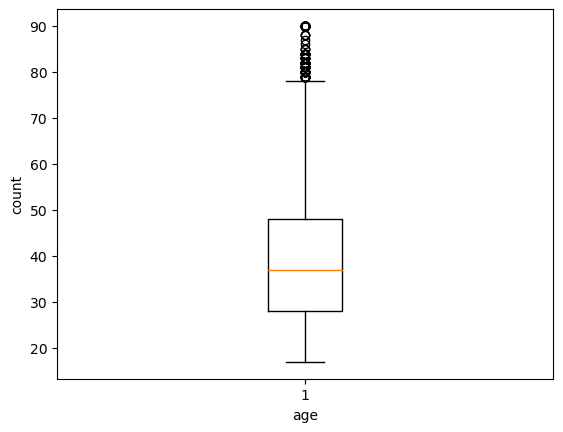

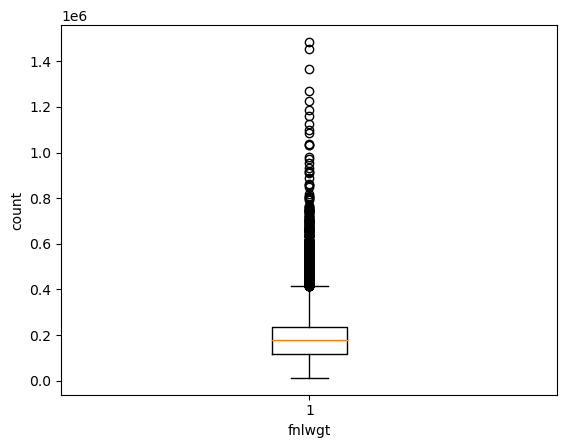

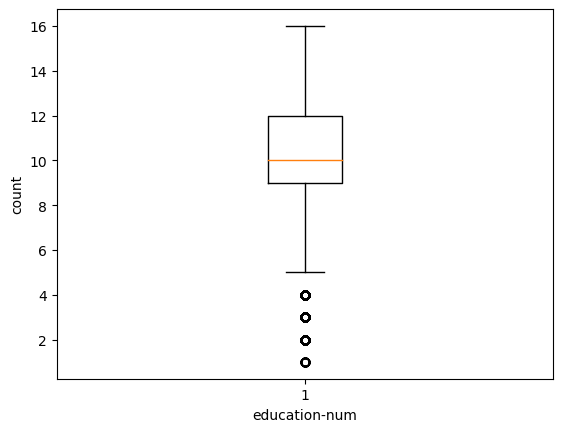

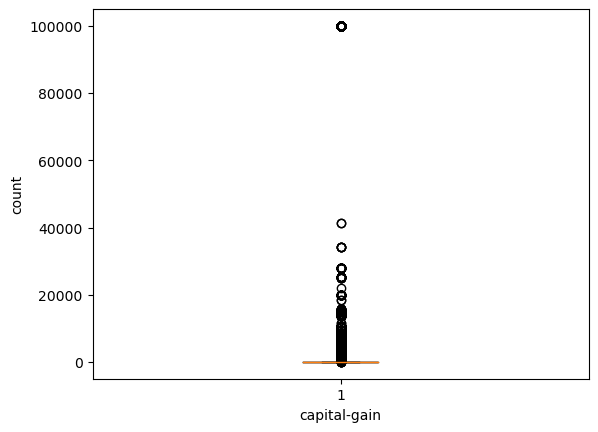

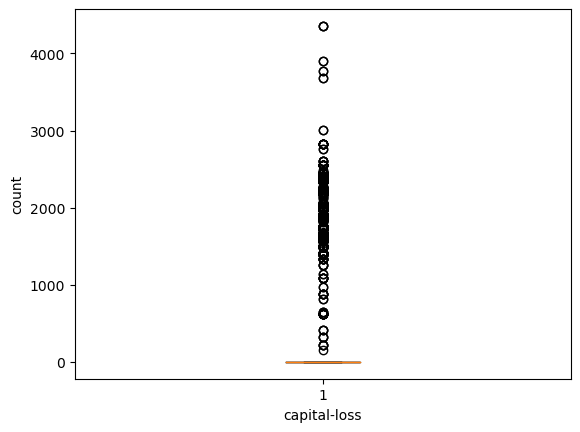

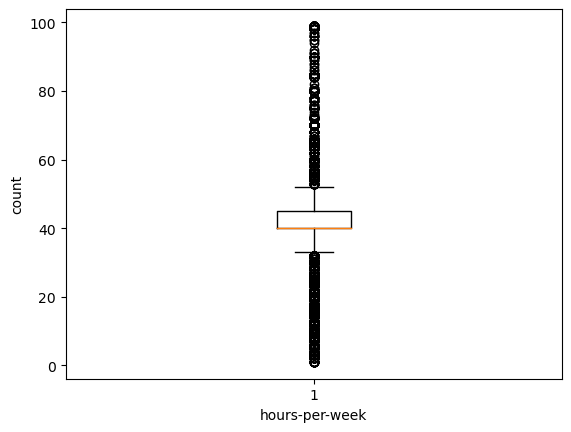

In [88]:
rcd.displayOutlierForAllcolumns()

In [89]:
rcd.remove_outlier()

age 37.0 -2.0 78.0
fnlwgt 178356.0 -61009.0 415887.0
education-num 10.0 4.5 16.5
capital-gain 0.0 0.0 0.0
capital-loss 0.0 0.0 0.0
hours-per-week 40.0 32.5 52.5


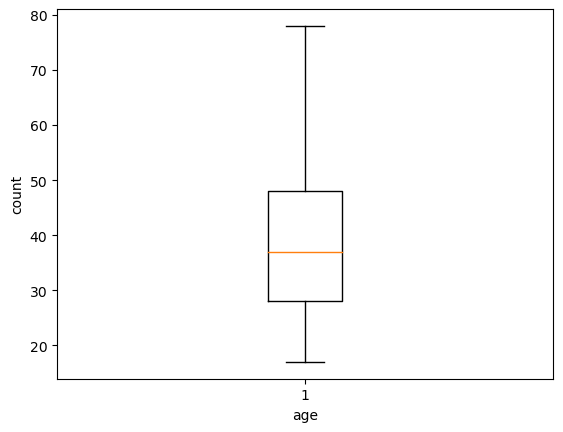

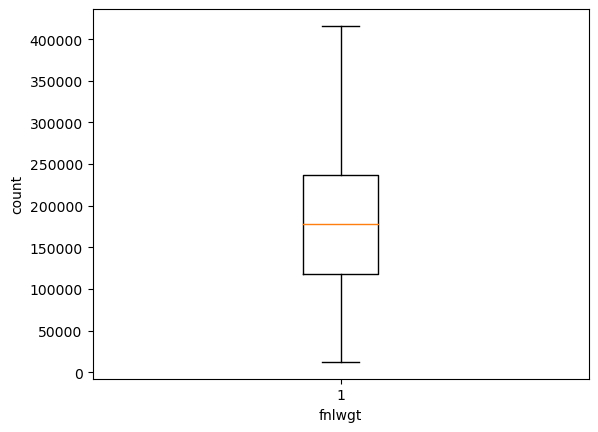

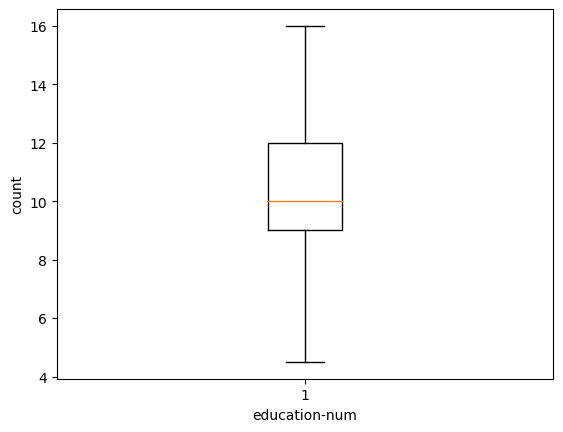

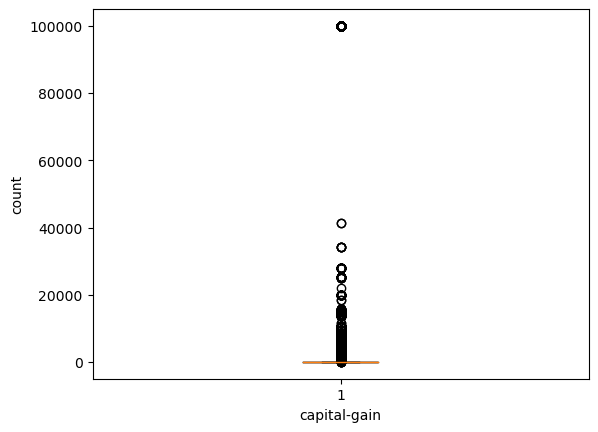

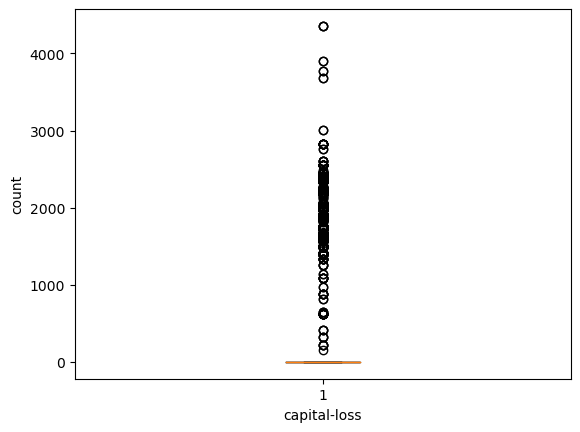

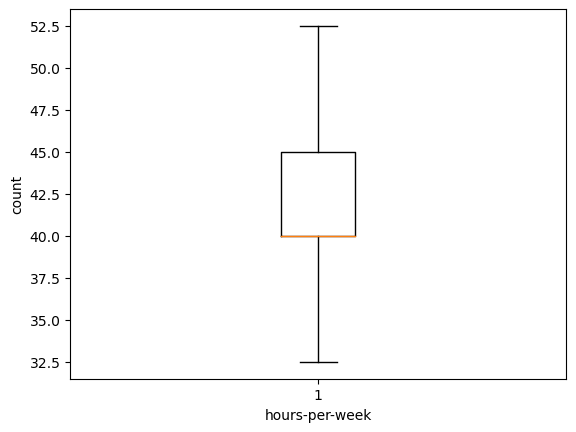

In [90]:
rcd.displayOutlierForAllcolumns()

In [91]:
# ● Change the labels of categorical data into numerical data using Label Encoder.

c_data = rcd.ApplyLabelEncoder(c_data)
c_data.tail()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Annual Income
32556,27,2,257302,7,12,2,12,5,4,0,0,0,38,38,0
32557,40,2,154374,11,9,2,6,0,4,1,0,0,40,38,1
32558,58,2,151910,11,9,6,0,4,4,0,0,0,40,38,0
32559,22,2,201490,11,9,4,0,3,4,1,0,0,20,38,0
32560,52,3,287927,11,9,2,3,5,4,0,15024,0,40,38,1


In [92]:
c_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30162 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   age             30162 non-null  int64
 1   workclass       30162 non-null  int32
 2   fnlwgt          30162 non-null  int64
 3   education       30162 non-null  int32
 4   education-num   30162 non-null  int64
 5   marital-status  30162 non-null  int32
 6   occupation      30162 non-null  int32
 7   relationship    30162 non-null  int32
 8   race            30162 non-null  int32
 9   sex             30162 non-null  int32
 10  capital-gain    30162 non-null  int64
 11  capital-loss    30162 non-null  int64
 12  hours-per-week  30162 non-null  int64
 13  native-country  30162 non-null  int32
 14  Annual Income   30162 non-null  int32
dtypes: int32(9), int64(6)
memory usage: 2.6 MB


In [93]:

# ObjectColsList = getObjectColumns(c_data)
# ObjectColsList

In [94]:
# ● Split the dataset into a train and test of proportions 70:30 and set the random state to 0.
c_data.corr()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Annual Income
age,1.000000,0.080540,-0.076511,-0.001111,0.043526,-0.276373,-0.005682,-0.246456,0.023374,0.081993,0.080154,0.060165,0.101599,-0.001905,0.241998
workclass,0.080540,1.000000,-0.032493,0.017855,0.037833,-0.034241,0.015572,-0.067417,0.044731,0.074973,0.035350,0.007204,0.050724,0.007668,0.018044
fnlwgt,-0.076511,-0.032493,1.000000,-0.027102,-0.044992,0.032163,0.000204,0.009298,-0.023895,0.025362,0.000422,-0.009750,-0.022886,-0.066717,-0.008957
education,-0.001111,0.017855,-0.027102,1.000000,0.345410,-0.040664,-0.038212,-0.012717,0.011154,-0.027888,0.030575,0.015028,0.059887,0.078790,0.078987
education-num,0.043526,0.037833,-0.044992,0.345410,1.000000,-0.063419,0.087717,-0.091935,0.032805,0.006157,0.124416,0.079646,0.152522,0.091555,0.335286
marital-status,-0.276373,-0.034241,0.032163,-0.040664,-0.063419,1.000000,0.022655,0.177964,-0.068627,-0.119813,-0.042418,-0.035203,-0.189003,-0.025902,-0.193518
occupation,-0.005682,0.015572,0.000204,-0.038212,0.087717,0.022655,1.000000,-0.053727,0.000717,0.062313,0.022162,0.014607,0.018365,-0.003483,0.051577
relationship,-0.246456,-0.067417,0.009298,-0.012717,-0.091935,0.177964,-0.053727,1.000000,-0.117143,-0.584876,-0.058259,-0.063567,-0.257850,-0.010809,-0.251003
race,0.023374,0.044731,-0.023895,0.011154,0.032805,-0.068627,0.000717,-0.117143,1.000000,0.089186,0.014353,0.023517,0.048532,0.124514,0.071658
sex,0.081993,0.074973,0.025362,-0.027888,0.006157,-0.119813,0.062313,-0.584876,0.089186,1.000000,0.048814,0.047011,0.231268,0.000618,0.216699


<Axes: >

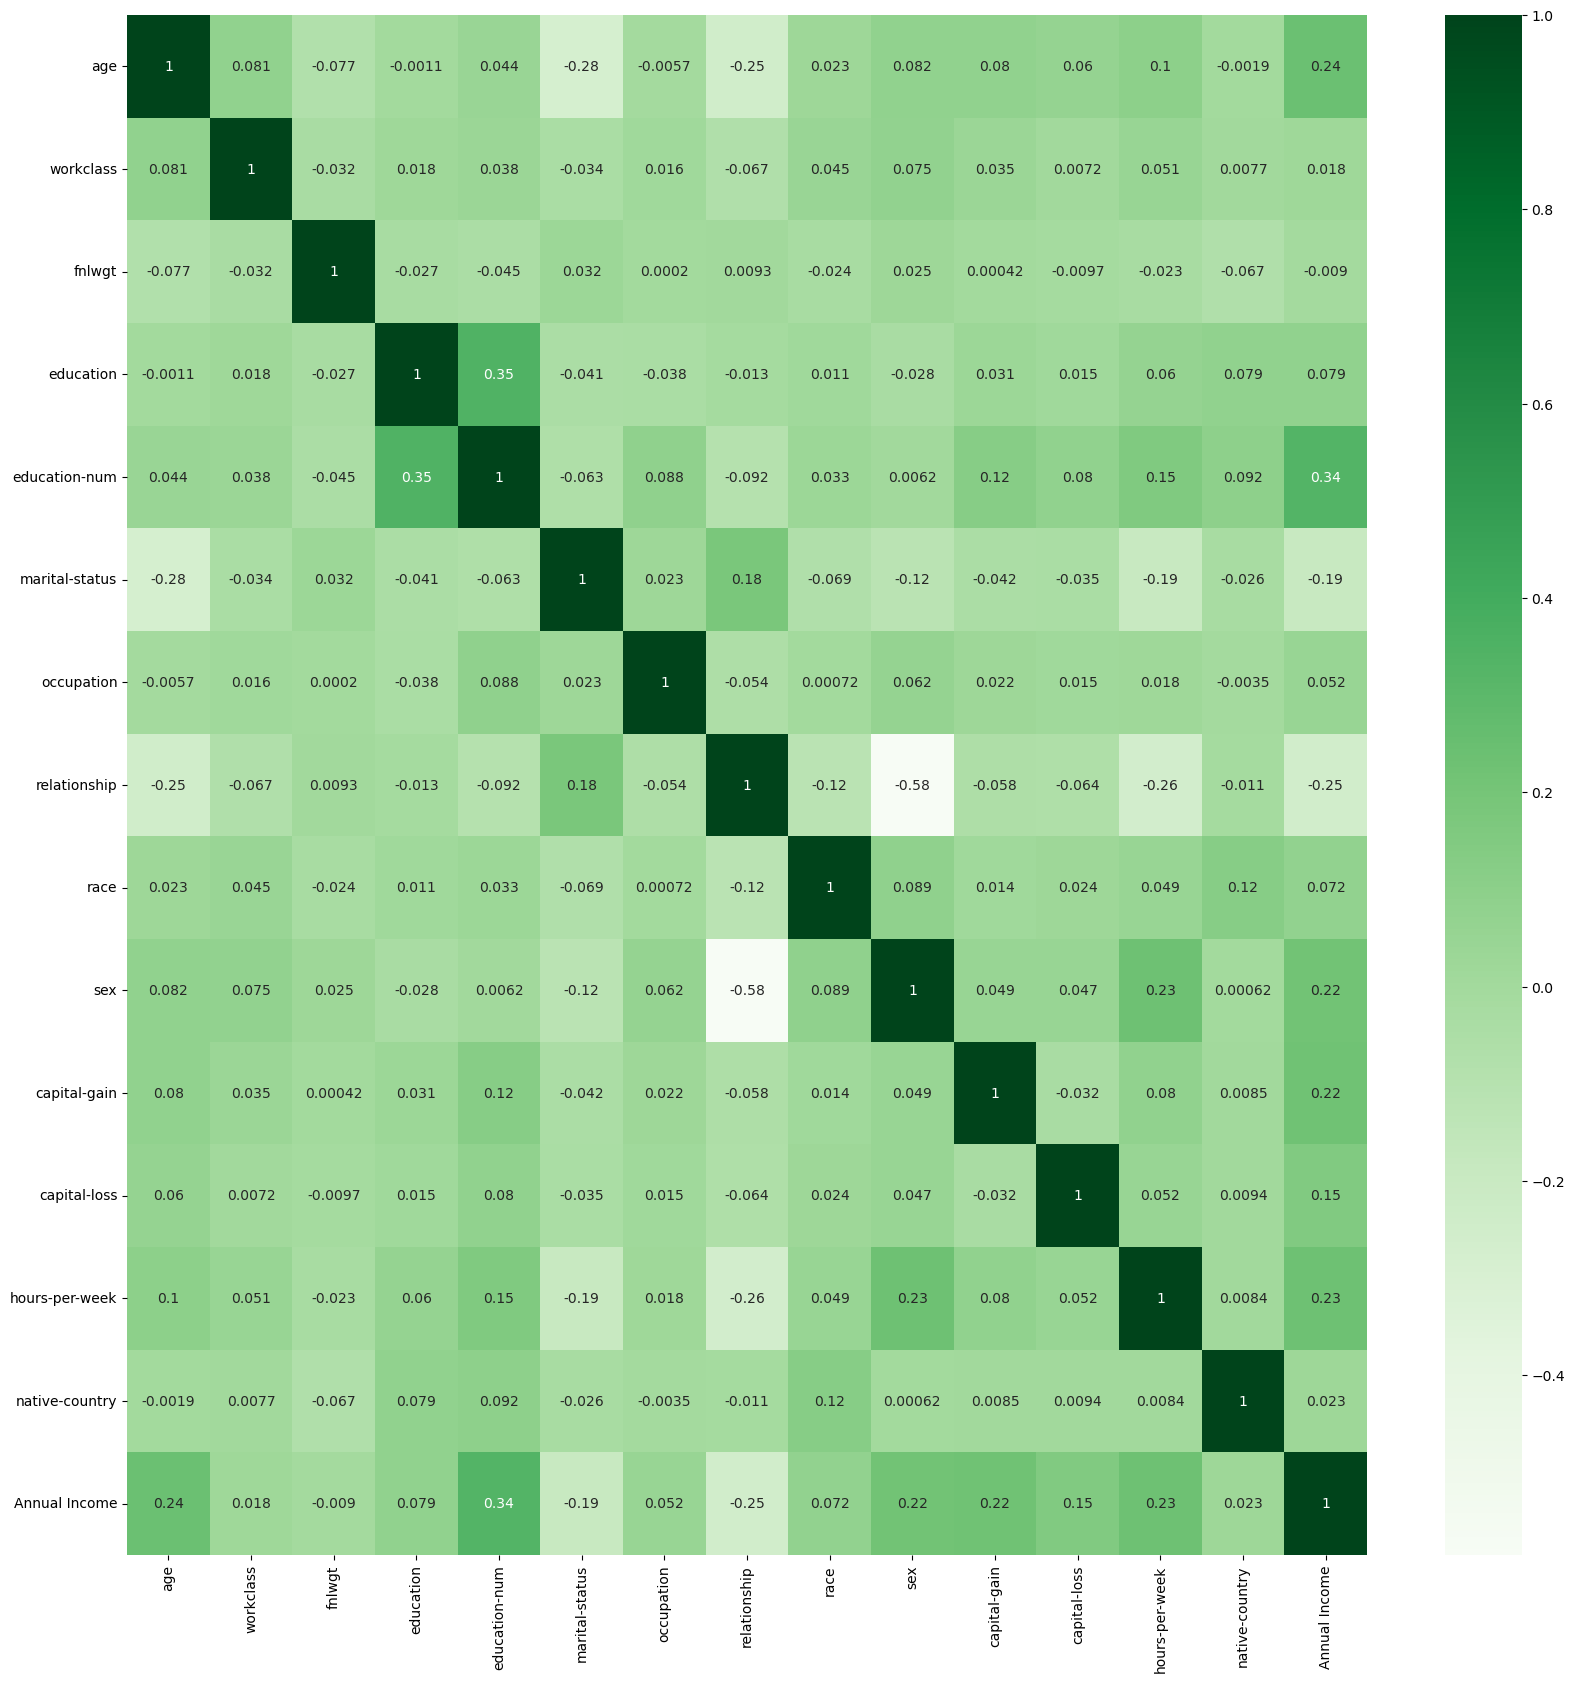

In [95]:
fig=plt.figure(figsize=(20,20))
sns.heatmap(c_data.corr(),cmap="Greens",annot=True)

In [96]:
col_list = rcd.getObjectColumns('All')
col_list

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'Annual Income'],
      dtype='object')

In [97]:
# c_data['Target']=0
c_data.head()
# c_data

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Annual Income
0,39,5,77516,9,13,4,0,1,4,1,2174,0,40,38,0
1,50,4,83311,9,13,2,3,0,4,1,0,0,13,38,0
2,38,2,215646,11,9,0,5,1,4,1,0,0,40,38,0
3,53,2,234721,1,7,2,5,0,2,1,0,0,40,38,0
4,28,2,338409,9,13,2,9,5,2,0,0,0,40,4,0


In [98]:
col_list =rcd.getColumns('Annual Income')
col_list

['age',
 'workclass',
 'fnlwgt',
 'education',
 'education-num',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'capital-gain',
 'capital-loss',
 'hours-per-week',
 'native-country']

In [99]:
# from statsmodels.stats.outliers_influence import variance_inflation_factor 
# cols=[]
# for col in c_data.columns:
#     if((c_data[col].dtype!='object') & (col!='y')): 
#         cols.append(col)

In [100]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 

In [101]:
x = c_data[col_list]
x.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39,5,77516,9,13,4,0,1,4,1,2174,0,40,38
1,50,4,83311,9,13,2,3,0,4,1,0,0,13,38
2,38,2,215646,11,9,0,5,1,4,1,0,0,40,38
3,53,2,234721,1,7,2,5,0,2,1,0,0,40,38
4,28,2,338409,9,13,2,9,5,2,0,0,0,40,4


In [102]:
def getVarianceInvlaceFactorData(data):
    vif_data=pd.DataFrame()
    vif_data["features"]=data.columns
    vif_data["vif_values"]=[variance_inflation_factor(data.values,i) for i in range(len(data.columns))]
    return vif_data

In [103]:

vif_data = getVarianceInvlaceFactorData(x)
vif_data

,features,vif_values
0,age,9.421110
1,workclass,6.249789
2,fnlwgt,4.031257
3,education,9.420582
4,education-num,19.078762
5,marital-status,4.016919
6,occupation,3.204596
7,relationship,2.620349
8,race,18.447208
9,sex,4.591675


In [104]:
# c_data=c_data.drop(["native-country"],axis=1)
# c_data

In [105]:
def getHighestVIF(vif_data):
    column_value = vif_data[vif_data.vif_values==vif_data.vif_values.max()]["features"]
    return column_value[column_value.index[0]]


In [106]:
# c_data_column_name = getHighestVIF(vif_data=vif_data)
# c_data_column_name

In [107]:
x = c_data[col_list]
x.head()
def dropHighVIFColumns(x):  
    vif_data = getVarianceInvlaceFactorData(x)
#     print(vif_data)
    while vif_data.vif_values.max() >5:
        if vif_data.vif_values.max() >5:
            column_name = getHighestVIF(vif_data=vif_data)  
            print(column_name)
            x=x.drop([column_name],axis=1)
            vif_data = getVarianceInvlaceFactorData(x)
    #         data = dropHighVIFColumns(data)
    return x

In [108]:
# c_data.head()

In [109]:
x = dropHighVIFColumns(x)
x.head()

native-country
education-num
race
hours-per-week
age
education


,workclass,fnlwgt,marital-status,occupation,relationship,sex,capital-gain,capital-loss
0,5,77516,4,0,1,1,2174,0
1,4,83311,2,3,0,1,0,0
2,2,215646,0,5,1,1,0,0
3,2,234721,2,5,0,1,0,0
4,2,338409,2,9,5,0,0,0


In [110]:

vif_data = getVarianceInvlaceFactorData(x)
vif_data

,features,vif_values
0,workclass,4.676145
1,fnlwgt,3.626214
2,marital-status,3.604964
3,occupation,2.920569
4,relationship,2.257107
5,sex,3.584990
6,capital-gain,1.028666
7,capital-loss,1.050323


In [111]:
# vif_data = dropHighVIFColumns(vif_data,"vif_values")
# vif_data

In [112]:
################### splitting data into dependent and Independent ##############
x #independent
y=c_data["Annual Income"]

In [113]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Annual Income, dtype: int32

In [114]:
x.head()

,workclass,fnlwgt,marital-status,occupation,relationship,sex,capital-gain,capital-loss
0,5,77516,4,0,1,1,2174,0
1,4,83311,2,3,0,1,0,0
2,2,215646,0,5,1,1,0,0
3,2,234721,2,5,0,1,0,0
4,2,338409,2,9,5,0,0,0


In [115]:
# splitting into training and testing ->  70:30 and set the random state to 0.
from sklearn.model_selection  import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=67)

In [116]:
x_train

,workclass,fnlwgt,marital-status,occupation,relationship,sex,capital-gain,capital-loss
19685,2,147258,2,2,0,1,0,0
13965,2,138497,2,11,0,1,0,0
32212,2,178416,0,5,1,0,0,0
19873,4,520078,0,11,4,1,0,0
18614,2,238685,4,7,1,0,0,0
...,...,...,...,...,...,...,...,...
11084,2,266072,4,7,1,1,0,0
25907,2,212114,4,9,3,0,0,0
1890,4,197015,2,4,0,1,0,0
22987,1,140851,2,7,0,1,0,0


In [117]:
y_train

19685    0
13965    1
32212    0
19873    0
18614    0
        ..
11084    0
25907    0
1890     0
22987    1
29630    0
Name: Annual Income, Length: 21113, dtype: int32

In [118]:
x_test

,workclass,fnlwgt,marital-status,occupation,relationship,sex,capital-gain,capital-loss
31757,2,143582,4,0,1,0,0,0
20529,2,152307,2,6,0,1,0,0
17381,2,65038,4,6,3,1,0,0
31522,2,154600,2,7,5,0,0,0
415,2,92440,0,2,1,1,0,0
...,...,...,...,...,...,...,...,...
11312,2,77905,0,0,1,0,0,0
7441,2,199739,2,13,0,1,7298,0
13830,2,142076,0,12,1,1,4787,0
16248,2,160703,2,0,0,1,0,0


In [119]:
y_test

31757    0
20529    1
17381    0
31522    0
415      1
        ..
11312    0
7441     1
13830    1
16248    0
15918    0
Name: Annual Income, Length: 9049, dtype: int32

In [120]:
# train_sizes, train_scores, test_scores = learning_curve(estimator,x, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes,scoring="f1", random_state=RANDOM_SEED, shuffle=True)

In [121]:
# from sklearn.linear_model import LogisticRegression
# lenreg = LogisticRegression()

# print(y_train[0:10])
# # y_train.to_csv(path='ytard.csv')

# if len(np.sum(y_train)) in [len(y_train),0]:
#     print("all one class")
#     #do something else
# else:
#     #OK to proceed
#     lenreg.fit(x_train, y_train)
#     y_pred = lenreg.predict(x_test)
#     print (metics.accuracy_score(y_test, y_pred))

In [122]:
# Model Implementation
from sklearn.linear_model import LogisticRegression
lo_model=LogisticRegression()
# training model
lo_model.fit(x_train,y_train)
y_pred=lo_model.predict(x_test)

In [123]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [124]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [125]:
accuracy_score(y_pred,y_test)

0.7944524256823958

In [126]:
cm=confusion_matrix(y_pred,y_test)

In [127]:
cm

array([[6599, 1672],
       [ 188,  590]], dtype=int64)

<Axes: >

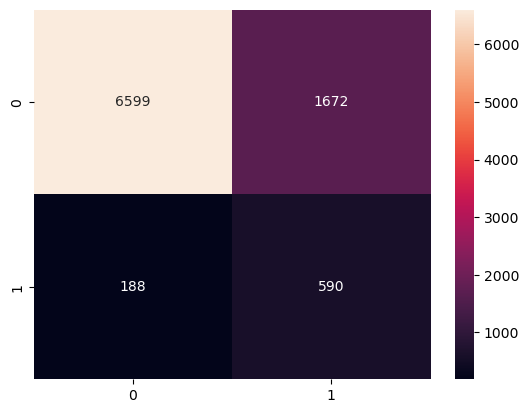

In [128]:
sns.heatmap(cm,annot=True,fmt="G")

In [129]:
y_test.value_counts()

0    6787
1    2262
Name: Annual Income, dtype: int64

# 14.What is the accuracy score of the above model?
    a. 0.60 to 0.70
    b. 0.40 to 0.60
    c. 0.70 to 0.85
    d. None of the above


In [130]:
accuracy_score(y_pred,y_test)

0.7944524256823958

In [131]:
score=lo_model.score(x_test,y_test)
score

0.7944524256823958

In [132]:
probability=lo_model.predict_proba(x_test)
probability

array([[0.6970502 , 0.3029498 ],
       [0.75796125, 0.24203875],
       [0.80653353, 0.19346647],
       ...,
       [0.50136101, 0.49863899],
       [0.64351061, 0.35648939],
       [0.67108295, 0.32891705]])

In [133]:
# check_predict = lo_model.predict(1)
# check_predict
# lo_model.predict(x_test)
len(y_pred)

9049

# Answer C

# 15.What is the specificity of the above model?
    a. 0.20 to 0.30
    b. 0.30 to 0.40
    c. 0.50 to 0.60
    d. None of the above


Specificity (also called the true negative rate) measures the proportion of negatives which are correctly identified as such (e.g., the percentage of healthy people who are correctly identified as not having the condition), and is complementary to the false positive rate.

# Specificity=true negatives/(true negative + false positives)
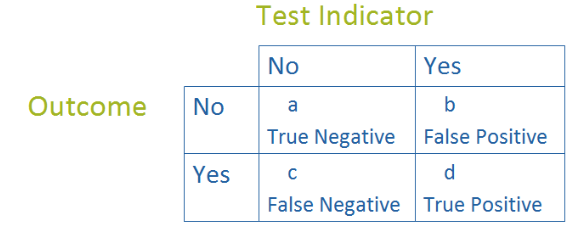

In [134]:
# [[7201, 1730],
#        [ 247,  591]
# Specificity=true negatives/(true negative + false positives)
Specificity = cm[0][0]/(cm[0][0] + cm[0][1])    
Specificity

0.7978479023092734

In [135]:
cm #[0][0]

array([[6599, 1672],
       [ 188,  590]], dtype=int64)

# Answer D

# 16.What is the model’s precision when the target is False?
    a. 0.60 to 0.70
    b. 0.40 to 0.60
    c. 0.70 to 0.80
    d. None of the above


# 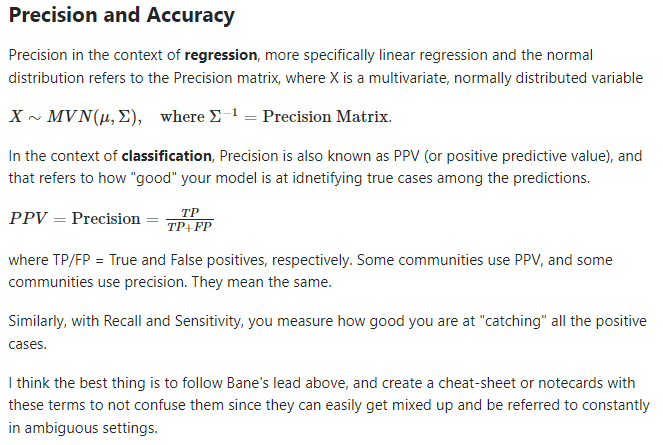

In [136]:
cm #[0][0]


array([[6599, 1672],
       [ 188,  590]], dtype=int64)

In [137]:
# [[7201, 1730],
#        [ 247,  591]
# Precision=TP/(TP+FP)
# Precision = True Positive / (True Positive + False Positive) 
Precision = cm[1][1]/(cm[1][1] + cm[0][1])    
Precision

0.2608311229000884

# 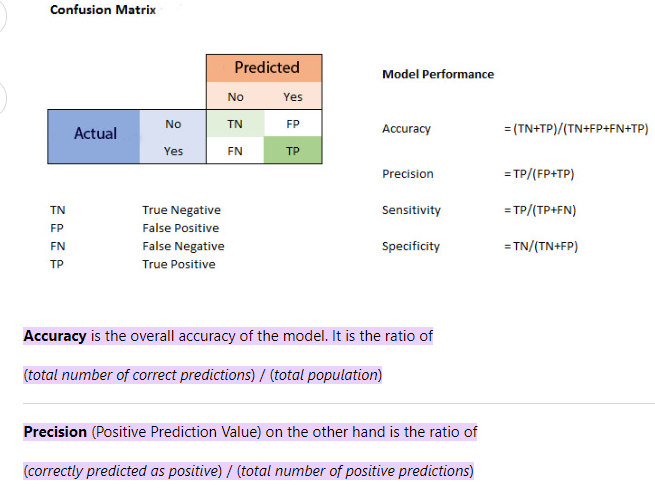

# Answer D

# 17.What is the total support value from the above model?
    a. 9049
    b. 9032
    c. 10000
    d. 9847


# 18.What is the f1 score of the above model when the target is True?
    a. 0.30 to 0.40
    b. 0.40 to 0.50
    c. 0.60 to 0.70
    d. 0.90 to 0.99


https://www.statology.org/f1-score-in-python/

# F1 Score = 2 * (Precision * Recall) / (Precision + Recall)

    where:

    Precision: Correct positive predictions relative to total positive predictions
    Recall: Correct positive predictions relative to total actual positives
    
    Precision = True Positive / (True Positive + False Positive) 

    Recall = True Positive / (True Positive + False Negative) 

In [138]:
cm [1][0]


188

In [139]:
# [[7201, 1730],
#        [ 247,  591]
# Precision = True Positive / (True Positive + False Positive) 
Precision = cm[1][1]/(cm[1][1] + cm[0][1])     
Precision
Recall = cm[1][1]/(cm[1][1] + cm[1][0]) 
Recall

# F1 Score = 2 * (Precision * Recall) / (Precision + Recall)
F1_Score = 2 * (Precision * Recall) / (Precision + Recall)
F1_Score

0.38815789473684215

In [140]:
cm[1]
p_cm=[cm[0][0],cm[0][1],cm[1][0],cm[1][1]]
p_cm

[6599, 1672, 188, 590]

In [141]:
cm

array([[6599, 1672],
       [ 188,  590]], dtype=int64)

In [142]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred)

0.38815789473684215

# Answer A

# 19.How many records are correctly classified by the model?
    a. 7173
    b. 7043
    c. 7000
    d. None of the above

In [143]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.97      0.88      6787
           1       0.76      0.26      0.39      2262

    accuracy                           0.79      9049
   macro avg       0.78      0.62      0.63      9049
weighted avg       0.79      0.79      0.75      9049

